In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from prophet import Prophet

Combining Crime, Inflation, and Unemployment data for charting and correlations

In [2]:
# Run US crime rates 1960 - 2014 notebook
%run crime_1960_2014.ipynb

,year,population,total,total_violent,total_nonviolent,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,vehicle_theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   year                55 non-null     int64
 1   population          55 non-null     int64
 2   total               55 non-null     int64
 3   total_violent       55 non-null     int64
 4   total_nonviolent    55 non-null     int64
 5   murder              55 non-null     int64
 6   forcible_rape       55 non-null     int64
 7   robbery             55 non-null     int64
 8   aggravated_assault  55 non-null     int64
 9   burglary            55 non-null     int64
 10  larceny_theft       55 non-null     int64
 11  vehicle_theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


None

In [3]:
# Run unemployment notebook
%run unemployment.ipynb

,country_name,country_code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,7.79,7.72,7.73,7.96,7.79,7.31,7.12,6.99,6.74,6.27,6.32,6.87,6.75,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,10.81,10.81,10.81,11.26,11.14,10.99,11.22,11.10,11.30,11.09,11.31,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,4.86,4.92,4.87,4.78,4.75,4.73,4.73,4.65,4.63,4.60,4.58,4.55,4.55,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,4.05,4.03,4.00,3.96,3.96,3.92,3.88,3.86,3.82,3.79,3.78,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,20.84,19.03,18.58,17.90,16.99,16.31,15.97,15.63,15.97,13.06,13.67,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  235 non-null    object 
 1   country_code  235 non-null    object 
 2   1991          235 non-null    float64
 3   1992          235 non-null    float64
 4   1993          235 non-null    float64
 5   1994          235 non-null    float64
 6   1995          235 non-null    float64
 7   1996          235 non-null    float64
 8   1997          235 non-null    float64
 9   1998          235 non-null    float64
 10  1999          235 non-null    float64
 11  2000          235 non-null    float64
 12  2001          235 non-null    float64
 13  2002          235 non-null    float64
 14  2003          235 non-null    float64
 15  2004          235 non-null    float64
 16  2005          235 non-null    float64
 17  2006          235 non-null    float64
 18  2007          235 non-null    

None

,year,unemployment_rate
0,1991,6.80
1,1992,7.50
2,1993,6.90
3,1994,6.12
4,1995,5.65


,year,unemployment_rate
26,2017,4.36
27,2018,3.90
28,2019,3.67
29,2020,8.05
30,2021,5.46


In [4]:
# Check if global variance is available
if "unemployment_us_melt" in globals():
    print("Global variable available.")
else:
    print("Unemployment variable not available.\nRerun notebook.")


Global variable available.


In [5]:
# Reset index to year
unemployment_us_melt = unemployment_us_melt.set_index('year')
unemployment_us_melt.head()

,unemployment_rate
year,
1991,6.80
1992,7.50
1993,6.90
1994,6.12
1995,5.65


In [6]:
# Check if global variance is available
if "total_crimes" in globals():
    print("Global variable available.")
else:
    print("Crimes variable not available.\nRerun notebook.")

Global variable available.


In [7]:
# Show unemployment index
unemployment_us_melt.index

Index(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object', name='year')

In [8]:
# Show crime index
total_crimes.index

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
           dtype='int64', name='year')

In [9]:
# Convert index to string
total_crimes.index = total_crimes.index.astype(str)

# Show crime index
total_crimes.index

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014'],
      dtype='object', name='year')

In [10]:
# Convert columns to strings
total_crimes.columns = total_crimes.columns.astype(str)

In [11]:
# Concat crime and unemployment data
crime_unemployment = pd.concat([total_crimes, unemployment_us_melt], join='inner', axis=1)
crime_unemployment.tail(20)

,total_violent,total_nonviolent,unemployment_rate
year,,,
1995,1.798790,12.063900,5.65
1996,1.688540,11.805300,5.45
1997,1.634770,11.558175,5.00
1998,1.531044,10.944590,4.51
1999,1.426044,10.208334,4.22
2000,1.425486,10.182586,3.99
2001,1.439480,10.437480,4.73
2002,1.423677,10.455277,5.78
2003,1.383676,10.442862,5.99


In [12]:
# Plot unemployment and crime rates to compare
crime_unemployment_plot = crime_unemployment.hvplot(
    title = "Crime Unemployment Comparison",
    xlabel = "Year",
    ylabel = "Rate",
    width = 1000,
    height = 500,
    grid = True,
    rot = 45
)

#Display plot
crime_unemployment_plot

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [13]:
# Run inflation notebook
%run inflation.ipynb

,country_code,imf_country_code,country,indicator_type,series_name,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,note,unnamed:_59,unnamed:_60,unnamed:_61,unnamed:_62,unnamed:_63
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.20,3.00,1.88,2.28,4.05,2.89,3.32,3.66,2.53,3.40,3.61,5.39,8.96,-2.14,2.08,4.32,0.63,-2.37,0.42,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.04,Annual average inflation,NaN,NaN,NaN,NaN,NaN
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,11.85,0.60,7.65,5.00,9.90,13.40,22.20,18.20,15.90,20.40,8.70,-2.10,18.40,27.50,71.50,47.40,43.80,58.19,33.99,20.01,14.00,14.01,14.01,14.01,14.01,0.00,-43.40,51.93,35.66,16.36,10.57,6.78,8.68,26.42,-6.81,2.18,11.80,6.44,7.39,4.67,-0.66,4.38,4.98,0.63,2.30,5.44,5.06,NaN,Annual average inflation,NaN,NaN,NaN,NaN,NaN
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,7.97,5.78,15.80,15.67,27.42,29.00,80.70,69.01,48.46,101.30,46.71,1.39,1.83,1.83,1.83,1.83,1.83,1.83,1.83,1.83,1.83,85.26,299.10,1379.48,949.77,2672.23,4146.01,221.49,107.43,248.25,325.03,152.59,108.89,98.22,43.53,22.96,13.31,12.25,12.47,13.72,14.48,13.48,10.28,8.78,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35,Annual average inflation,NaN,NaN,NaN,NaN,NaN
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.18,35.72,226.00,85.00,22.57,7.75,12.80,33.21,20.55,0.40,0.03,3.10,5.18,2.38,2.83,2.36,2.41,2.91,3.41,2.29,3.57,3.41,2.03,1.93,1.62,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.73,Annual average inflation,NaN,NaN,NaN,NaN,NaN
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.98,21.98,21.98,21.98,21.98,21.98,21.98,21.97,13.04,10.99,10.07,7.95,7.08,1.30,2.43,3.50,5.43,5.50,4.99,2.79,0.60,3.40,6.38,5.27,5.70,4.33,2.98,2.97,1.99,2.10,1.35,2.80,2.92,3.12,5.04,6.20,9.28,11.13,12.27,1.57,0.88,0.88,0.66,1.09,2.34,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22,Annual average inflation,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_code      783 non-null    object 
 1   imf_country_code  781 non-null    float64
 2   country           783 non-null    object 
 3   indicator_type    783 non-null    object 
 4   series_name       783 non-null    object 
 5   1970              422 non-null    float64
 6   1971              428 non-null    float64
 7   1972              430 non-null    float64
 8   1973              430 non-null    float64
 9   1974              434 non-null    float64
 10  1975              434 non-null    float64
 11  1976              430 non-null    float64
 12  1977              427 non-null    float64
 13  1978              428 non-null    float64
 14  1979              428 non-null    float64
 15  1980              433 non-null    float64
 16  1981              451 non-null    float64
 1

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_code      5 non-null      object 
 1   imf_country_code  5 non-null      float64
 2   country           5 non-null      object 
 3   indicator_type    5 non-null      object 
 4   series_name       5 non-null      object 
 5   1970              4 non-null      float64
 6   1971              4 non-null      float64
 7   1972              4 non-null      float64
 8   1973              4 non-null      float64
 9   1974              4 non-null      float64
 10  1975              4 non-null      float64
 11  1976              4 non-null      float64
 12  1977              4 non-null      float64
 13  1978              4 non-null      float64
 14  1979              4 non-null      float64
 15  1980              4 non-null      float64
 16  1981              4 non-null      float64
 17  1

series_name,Food Consumer Price Inflation,Headline Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation
year,,,,
1970,5.40,5.90,6.245934,3.61
1971,3.07,4.29,4.690000,3.33
1972,4.13,3.27,3.060000,4.41
1973,13.29,6.18,3.480000,13.14
1974,13.76,11.05,8.240000,18.81


series_name,Food Consumer Price Inflation,Headline Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation
year,,,,
2018,1.40,2.44,2.14,2.90
2019,0.89,1.81,2.19,1.69
2020,3.51,1.23,1.70,-2.12
2021,3.47,4.70,3.57,8.95
2022,11.35,8.00,6.22,7.91


In [14]:
# Check if global variance is available
if "inflation_us_pivot" in globals():
    print("Global variable available.")
else:
    print("Inflation variable not available.\nRerun notebook.")

Global variable available.


In [15]:
# Show inflation index
inflation_us_pivot.index

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object', name='year')

In [16]:
# Combine data from crime and unemployment with inflation
combined_data = pd.concat([crime_unemployment, inflation_us_pivot["Official Core Consumer Price Inflation"]], join='inner', axis=1)
combined_data

,total_violent,total_nonviolent,unemployment_rate,Official Core Consumer Price Inflation
year,,,,
1991,1.911770,12.961100,6.80,4.91
1992,1.932270,12.505900,7.50,3.66
1993,1.926020,12.218800,6.90,3.30
1994,1.857670,12.131900,6.12,2.85
1995,1.798790,12.063900,5.65,2.99
1996,1.688540,11.805300,5.45,2.70
1997,1.634770,11.558175,5.00,2.39
1998,1.531044,10.944590,4.51,2.29
1999,1.426044,10.208334,4.22,2.08


In [17]:
# Plot combined rates to compare
combined_data_plot = combined_data.hvplot(
    title = "Crime Unemployment Inflation Comparison",
    xlabel = "Year",
    ylabel = "Rate",
    width = 1000,
    height = 500,
    grid = True,
    rot = 45
)

#Display plot
combined_data_plot

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [18]:
# 
correlation_matrix = combined_data.corr()
display(correlation_matrix)

,total_violent,total_nonviolent,unemployment_rate,Official Core Consumer Price Inflation
total_violent,1.000000,0.970238,-0.171216,0.840357
total_nonviolent,0.970238,1.000000,-0.247883,0.813683
unemployment_rate,-0.171216,-0.247883,1.000000,-0.200273
Official Core Consumer Price Inflation,0.840357,0.813683,-0.200273,1.000000


Summary Correlations:

.75 to 1.0 Strong Positive Correlation
.50 to .75 Moderate Positive Correlation
.25 to .50 Weak Positive Correlation
-.25 to .25 No or Weak Correlation
-.25 to -.50 Weak Negative Correlation
-.50 to -.75 Moderate Negative Correlation
-.75 to -1.0 Strong Negative Correlation

Based on the matrix, the Official Core Consumer Price Inflation is has a strong positive correlation with both total violent and total non violent crimes. Total non violent and total violent have a strong positive correlation.

Unemployment rate has a no or weak negative correlation to crimes and inflation.

In [19]:
inflation_us_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 1970 to 2022
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Food Consumer Price Inflation           53 non-null     float64
 1   Headline Consumer Price Inflation       53 non-null     float64
 2   Official Core Consumer Price Inflation  53 non-null     float64
 3   Producer Price Inflation                53 non-null     float64
dtypes: float64(4)
memory usage: 4.1+ KB


Using Prophet for forecasting inflation

In [20]:
# Create new dataframe from core consumer price inflation
inflation_trends = inflation_us_pivot["Official Core Consumer Price Inflation"].to_frame()

# Display head and tail
display(inflation_trends.head())
display(inflation_trends.tail())

,Official Core Consumer Price Inflation
year,
1970,6.245934
1971,4.690000
1972,3.060000
1973,3.480000
1974,8.240000


,Official Core Consumer Price Inflation
year,
2018,2.14
2019,2.19
2020,1.70
2021,3.57
2022,6.22


In [21]:
# Reset the index
inflation_trends.reset_index(inplace=True)

# Label the columns for Prophet
inflation_trends.columns = ["ds", "y"]

# Display dtype
inflation_trends.dtypes

ds     object
y     float64
dtype: object

In [22]:
# Tranlate year object to date time using last day of year for year data
inflation_trends["ds"] = pd.to_datetime(inflation_trends["ds"])

# Display dtype
inflation_trends.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [23]:
inflation_trends

,ds,y
0,1970-01-01,6.245934
1,1971-01-01,4.690000
2,1972-01-01,3.060000
3,1973-01-01,3.480000
4,1974-01-01,8.240000
5,1975-01-01,9.220000
6,1976-01-01,6.570000
7,1977-01-01,6.250000
8,1978-01-01,7.310000
9,1979-01-01,9.740000


In [24]:
# Call the Prophet function, store as an object
inflation_m = Prophet()
inflation_m

In [25]:
# Fit the time-series model.
inflation_m.fit(inflation_trends)

04:17:00 - cmdstanpy - INFO - Chain [1] start processing
04:17:00 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 20 years
future_inflation_trends = inflation_m.make_future_dataframe(periods=20, freq="Y")

# View the last five rows of the future_inflation_trends DataFrame
future_inflation_trends.tail()

,ds
68,2037-12-31
69,2038-12-31
70,2039-12-31
71,2040-12-31
72,2041-12-31


In [27]:
# Make the predictions for the trend data using the future_inflation_trends DataFrame
forecast_inflation_trends = inflation_m.predict(future_inflation_trends)

# Display the head and tail of forecast_inflation_trends DataFrame
display(forecast_inflation_trends.head())
display(forecast_inflation_trends.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,-1.414489,4.249215,9.312231,-1.414489,-1.414489,8.283351,8.283351,8.283351,8.283351,8.283351,8.283351,0.0,0.0,0.0,6.868862
1,1971-01-01,-1.525195,4.337099,9.215121,-1.525195,-1.525195,8.248503,8.248503,8.248503,8.248503,8.248503,8.248503,0.0,0.0,0.0,6.723309
2,1972-01-01,-1.635900,4.161836,8.911337,-1.635900,-1.635900,8.177319,8.177319,8.177319,8.177319,8.177319,8.177319,0.0,0.0,0.0,6.541419
3,1973-01-01,-1.746909,4.165413,8.891854,-1.746909,-1.746909,8.281813,8.281813,8.281813,8.281813,8.281813,8.281813,0.0,0.0,0.0,6.534904
4,1974-01-01,-1.857614,4.108145,8.795244,-1.857614,-1.857614,8.283351,8.283351,8.283351,8.283351,8.283351,8.283351,0.0,0.0,0.0,6.425737


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
68,2037-12-31,-8.947165,-3.451809,1.328020,-8.947172,-8.947156,7.926443,7.926443,7.926443,7.926443,7.926443,7.926443,0.0,0.0,0.0,-1.020721
69,2038-12-31,-9.057866,-3.796020,1.113777,-9.057874,-9.057857,7.747156,7.747156,7.747156,7.747156,7.747156,7.747156,0.0,0.0,0.0,-1.310710
70,2039-12-31,-9.168567,-4.209623,0.755765,-9.168576,-9.168557,7.532337,7.532337,7.532337,7.532337,7.532337,7.532337,0.0,0.0,0.0,-1.636229
71,2040-12-31,-9.279571,-3.774476,1.337070,-9.279581,-9.279561,8.069908,8.069908,8.069908,8.069908,8.069908,8.069908,0.0,0.0,0.0,-1.209663
72,2041-12-31,-9.390272,-3.827724,0.764840,-9.390283,-9.390261,7.926443,7.926443,7.926443,7.926443,7.926443,7.926443,0.0,0.0,0.0,-1.463829


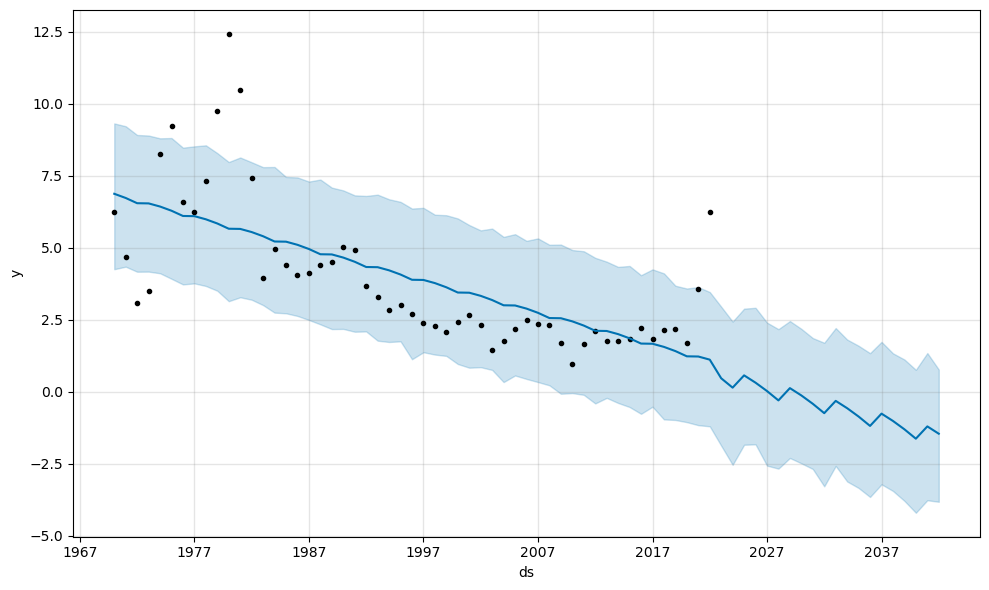

In [28]:
# Plot the Prophet predictions for the inflation trends data

# Added ; to prevent 2 plots from displaying

inflation_m.plot(forecast_inflation_trends);

In [29]:
# !!!! Need to look at this Prophet data
# Maybe 2022 and 2021 seem to show as outliers
# Need explanation for why this would be a bad use of prophet

Using Prophet for forecasting total nonviolent crimes

In [30]:
# Create new dataframe from non violent crimes
total_nonviolent_trends = total_crimes["total_nonviolent"].to_frame()

# Display head and tail
display(total_nonviolent_trends.head())
display(total_nonviolent_trends.tail())

,total_nonviolent
year,
1960,3.0957
1961,3.1986
1962,3.4507
1963,3.7925
1964,4.2004


,total_nonviolent
year,
2010,9.112625
2011,9.052743
2012,9.001992
2013,8.650761
2014,8.277829


In [31]:
# Reset the index
total_nonviolent_trends.reset_index(inplace=True)

# Label the columns for Prophet
total_nonviolent_trends.columns = ["ds", "y"]

# Display dtype
total_nonviolent_trends.dtypes

ds     object
y     float64
dtype: object

In [32]:
# Tranlate year object to date time using last day of year for year data
total_nonviolent_trends["ds"] = pd.to_datetime(total_nonviolent_trends["ds"])

# Display dtype
total_nonviolent_trends.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [33]:
# Call the Prophet function, store as an object
total_nonviolent_m = Prophet()
total_nonviolent_m

In [34]:
# Fit the time-series model.
total_nonviolent_m.fit(total_nonviolent_trends)

04:17:00 - cmdstanpy - INFO - Chain [1] start processing


04:17:00 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 20 years
future_total_nonviolent_trends = total_nonviolent_m.make_future_dataframe(periods=20, freq="Y")

# View the last five rows of the future_inflation_trends DataFrame
future_total_nonviolent_trends.tail()

,ds
70,2029-12-31
71,2030-12-31
72,2031-12-31
73,2032-12-31
74,2033-12-31


In [36]:
# Make the predictions for the trend data using the future_total_nonviolent_trends DataFrame
forecast_total_nonviolent_trends = total_nonviolent_m.predict(future_total_nonviolent_trends)

# Display the head and tail of forecast_total_nonviolent_trends DataFrame
display(forecast_total_nonviolent_trends.head())
display(forecast_total_nonviolent_trends.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,0.190738,2.236277,3.330625,0.190738,0.190738,2.568439,2.568439,2.568439,2.568439,2.568439,2.568439,0.0,0.0,0.0,2.759177
1,1961-01-01,0.626689,2.561832,3.671150,0.626689,0.626689,2.482509,2.482509,2.482509,2.482509,2.482509,2.482509,0.0,0.0,0.0,3.109197
2,1962-01-01,1.061448,3.042631,4.090546,1.061448,1.061448,2.510366,2.510366,2.510366,2.510366,2.510366,2.510366,0.0,0.0,0.0,3.571814
3,1963-01-01,1.496207,3.481534,4.542570,1.496207,1.496207,2.539024,2.539024,2.539024,2.539024,2.539024,2.539024,0.0,0.0,0.0,4.035231
4,1964-01-01,1.930967,3.962152,5.062532,1.930967,1.930967,2.568439,2.568439,2.568439,2.568439,2.568439,2.568439,0.0,0.0,0.0,4.499405


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
70,2029-12-31,3.381277,4.809733,7.179593,2.291890,4.346599,2.629354,2.629354,2.629354,2.629354,2.629354,2.629354,0.0,0.0,0.0,6.010631
71,2030-12-31,3.214933,4.598253,7.087250,2.021577,4.291012,2.660755,2.660755,2.660755,2.660755,2.660755,2.660755,0.0,0.0,0.0,5.875688
72,2031-12-31,3.048588,4.301736,7.100716,1.758699,4.215196,2.692716,2.692716,2.692716,2.692716,2.692716,2.692716,0.0,0.0,0.0,5.741305
73,2032-12-31,2.881789,3.947537,6.926522,1.490109,4.144505,2.598565,2.598565,2.598565,2.598565,2.598565,2.598565,0.0,0.0,0.0,5.480354
74,2033-12-31,2.715444,3.771973,6.790555,1.186157,4.078594,2.629354,2.629354,2.629354,2.629354,2.629354,2.629354,0.0,0.0,0.0,5.344798


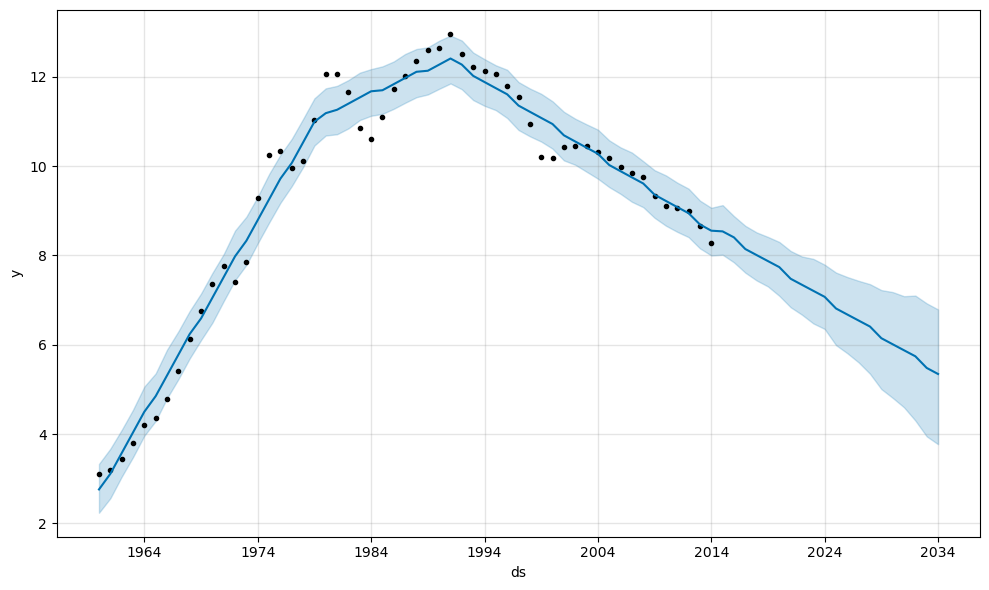

In [37]:
# Plot the Prophet predictions for the total nonviolent trends data

# Added ; to prevent 2 plots from displaying

total_nonviolent_m.plot(forecast_total_nonviolent_trends);

Using Prophet for forecasting total violent crimes

In [38]:
# Create new dataframe from violent crimes
total_violent_trends = total_crimes["total_violent"].to_frame()

# Display head and tail
display(total_violent_trends.head())
display(total_violent_trends.tail())

,total_violent
year,
1960,0.28846
1961,0.28939
1962,0.30151
1963,0.31697
1964,0.36422


,total_violent
year,
2010,1.251248
2011,1.206031
2012,1.217067
2013,1.199684
2014,1.197987


In [39]:
# Reset the index
total_violent_trends.reset_index(inplace=True)

# Label the columns for Prophet
total_violent_trends.columns = ["ds", "y"]

# Display dtype
total_violent_trends.dtypes

ds     object
y     float64
dtype: object

In [40]:
# Tranlate year object to date time using last day of year for year data
total_violent_trends["ds"] = pd.to_datetime(total_violent_trends["ds"])

# Display dtype
total_violent_trends.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [41]:
# Call the Prophet function, store as an object
total_violent_m = Prophet()
total_violent_m

In [42]:
# Fit the time-series model.
total_violent_m.fit(total_violent_trends)

04:17:01 - cmdstanpy - INFO - Chain [1] start processing


04:17:01 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 20 years
future_total_violent_trends = total_violent_m.make_future_dataframe(periods=20, freq="Y")

# View the last five rows 
future_total_violent_trends.tail()

,ds
70,2029-12-31
71,2030-12-31
72,2031-12-31
73,2032-12-31
74,2033-12-31


In [44]:
# Make the predictions for the trend data 
forecast_total_violent_trends = total_violent_m.predict(future_total_violent_trends)

# Display the head and tail 
display(forecast_total_violent_trends.head())
display(forecast_total_violent_trends.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,-0.097630,0.223425,1.020826,-0.097630,-0.097630,0.735999,0.735999,0.735999,0.735999,0.735999,0.735999,0.0,0.0,0.0,0.638369
1,1961-01-01,-0.076955,0.213499,1.064848,-0.076955,-0.076955,0.722573,0.722573,0.722573,0.722573,0.722573,0.722573,0.0,0.0,0.0,0.645618
2,1962-01-01,-0.056337,0.255047,1.082203,-0.056337,-0.056337,0.729914,0.729914,0.729914,0.729914,0.729914,0.729914,0.0,0.0,0.0,0.673577
3,1963-01-01,-0.035719,0.297728,1.087963,-0.035719,-0.035719,0.734392,0.734392,0.734392,0.734392,0.734392,0.734392,0.0,0.0,0.0,0.698673
4,1964-01-01,-0.015100,0.309793,1.109214,-0.015100,-0.015100,0.735999,0.735999,0.735999,0.735999,0.735999,0.735999,0.0,0.0,0.0,0.720898


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
70,2029-12-31,1.338283,1.678738,2.488534,1.337914,1.338644,0.730603,0.730603,0.730603,0.730603,0.730603,0.730603,0.0,0.0,0.0,2.068886
71,2030-12-31,1.358698,1.679922,2.486073,1.358292,1.359094,0.723613,0.723613,0.723613,0.723613,0.723613,0.723613,0.0,0.0,0.0,2.082311
72,2031-12-31,1.379113,1.686349,2.515259,1.378674,1.379540,0.713776,0.713776,0.713776,0.713776,0.713776,0.713776,0.0,0.0,0.0,2.092889
73,2032-12-31,1.399584,1.733341,2.541565,1.399102,1.400050,0.734735,0.734735,0.734735,0.734735,0.734735,0.734735,0.0,0.0,0.0,2.134318
74,2033-12-31,1.419998,1.735543,2.538978,1.419478,1.420504,0.730603,0.730603,0.730603,0.730603,0.730603,0.730603,0.0,0.0,0.0,2.150602


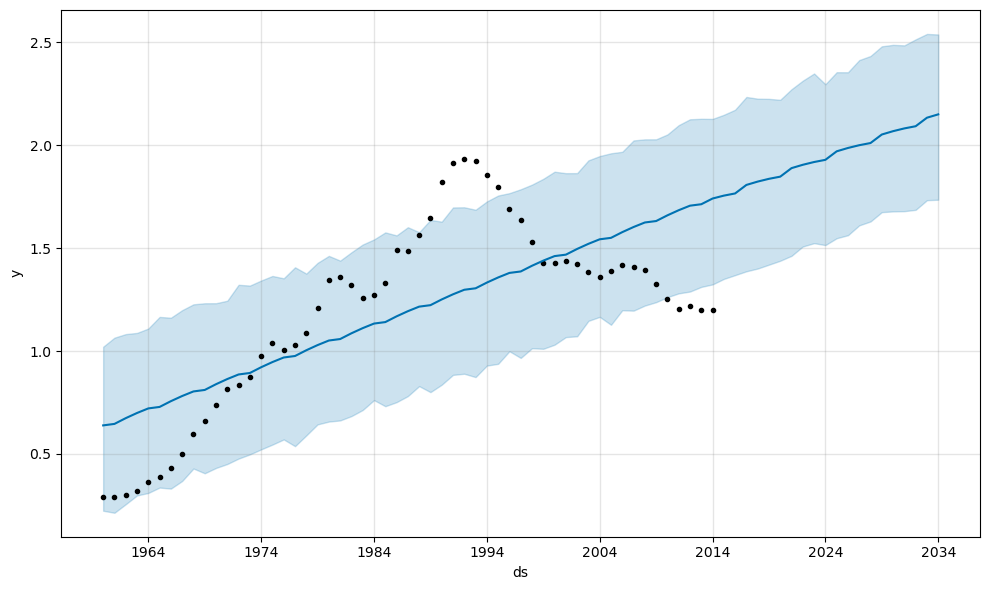

In [45]:
# Plot the Prophet predictions

# Added ; to prevent 2 plots from displaying

total_violent_m.plot(forecast_total_violent_trends);